In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_excel('mvp_analysis_2010_2024_FINAL.xlsx')

In [7]:
df.head()

,season,player_id,team,g,per,ws,vorp,pts_per_game,trb_per_game,ast_per_game,w,share,winner,colleges,overall_pick
0,2024,sabondo01,SAC,82,23.2,12.6,6.2,19.4,13.7,8.2,46,0.003,False,Gonzaga,11
1,2010,stoudam01,PHO,82,22.6,10.7,2.2,23.1,8.9,1.0,54,0.004,False,No College Info,9
2,2010,howardw01,ORL,82,24.0,13.2,4.6,18.3,13.2,1.8,59,0.389,False,No College Info,1
3,2015,paulch01,LAC,82,26.0,16.1,7.2,19.1,4.6,10.2,56,0.095,False,Wake Forest,4
4,2016,hardeja01,HOU,82,25.3,13.3,6.8,29.0,6.1,7.5,41,0.007,False,Arizona State,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        195 non-null    int64  
 1   player_id     195 non-null    object 
 2   team          195 non-null    object 
 3   g             195 non-null    int64  
 4   per           195 non-null    float64
 5   ws            195 non-null    float64
 6   vorp          195 non-null    float64
 7   pts_per_game  195 non-null    float64
 8   trb_per_game  195 non-null    float64
 9   ast_per_game  195 non-null    float64
 10  w             195 non-null    int64  
 11  share         195 non-null    float64
 12  winner        195 non-null    bool   
 13  colleges      195 non-null    object 
 14  overall_pick  195 non-null    int64  
dtypes: bool(1), float64(7), int64(4), object(3)
memory usage: 21.6+ KB


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant numeric columns as predictors
features = ['per', 'ws', 'vorp', 'pts_per_game', 'trb_per_game', 'ast_per_game', 'w']
X = df[features]
y = df['winner'].astype(int)  # convert True/False → 1/0

# Split data for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

rf_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(rf_importance)


        Feature  Importance
0           per    0.309378
2          vorp    0.178484
1            ws    0.174866
6             w    0.127405
4  trb_per_game    0.073122
3  pts_per_game    0.069830
5  ast_per_game    0.066915


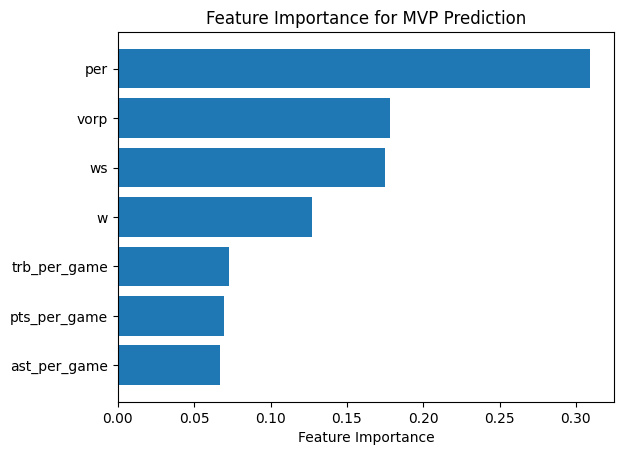

In [19]:
import matplotlib.pyplot as plt

plt.barh(rf_importance['Feature'], rf_importance['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for MVP Prediction')
plt.gca().invert_yaxis()
plt.show()
